# 多クラス分類の例題

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters


np.random.seed(20201231)
tf.random.set_seed(20201231)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
#評価データの作成
x_val = x_train[:2000]
x_train = x_train[2000:]
y_val = y_train[:2000]
y_train = y_train[2000:]
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

print('\nx_train')
print(x_train)

print('\ny_train')
print(y_train)

x_train.shape:  (6982,)
y_train.shape:  (6982,)
x_val.shape:  (2000,)
y_val.shape:  (2000,)
x_test.shape:  (2246,)
y_test.shape:  (2246,)

x_train
[list([1, 53, 965, 26, 14, 462, 26, 39, 2958, 70, 11, 14, 5149, 70, 11, 86, 12, 61, 35, 14, 12, 59, 35, 180, 183, 4002, 70, 11, 14, 3809, 70, 11, 17, 12])
 list([1, 94, 156, 48, 153, 53, 46, 312, 26, 14, 46, 160, 26, 39, 46, 957, 5139, 14, 74, 2115, 5715, 86, 4264, 3678, 14, 5790, 5942, 17, 12])
 list([1, 9314, 705, 71, 9, 697, 3086, 3575, 705, 149, 8, 77, 2, 524, 1505, 122, 28, 125, 2279, 324, 2, 1562, 340, 1280, 7, 4, 2, 92, 10, 883, 2187, 4, 449, 77, 8, 122, 34, 4362, 21, 518, 5, 10, 1417, 3948, 9, 2720, 5, 1982, 742, 77, 349, 400, 404, 13, 4, 780, 9, 2117, 41, 135, 360, 19, 11, 15, 348, 109, 11, 15, 5, 885, 244, 4, 3482, 883, 1821, 340, 122, 5, 648, 639, 1069, 10, 29, 28, 10, 419, 5, 2084, 342, 15, 10, 434, 1307, 77, 8, 9314, 9, 697, 3086, 3575, 8, 4, 1126, 41, 1146, 10, 279, 20, 92, 131, 573, 101, 5, 810, 28, 10, 340, 96, 5, 628, 37, 38

In [3]:
#データセット0番目の内容を文章に戻してみる
print('\nデータセット0番目の内容を文章に戻してみる')
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#0はパディング、1はシーケンスの開始、2が不明として予約されているため除外する
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print(decoded_newswire)


データセット0番目の内容を文章に戻してみる
? shr 78 cts vs 86 cts net 265 0 mln vs 283 0 mln revs 3 7 billion vs 3 6 billion avg shrs 329 0 mln vs 319 0 mln reuter 3


# Modify input data

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_val = vectorize_sequences(x_val)
x_test = vectorize_sequences(x_test)
print('\nx_train')
print(x_train)
print('\nx_test')
print(x_test)

#labelは46種類あるため、要素46のOneHotに変換する
y_train = to_categorical(y_train, 46)
y_val = to_categorical(y_val, 46)
y_test = to_categorical(y_test, 46)
print('\ny_train')
print(y_train)


x_train
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

x_test
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

y_train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Create deep learning layer

In [5]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


# Trainning

Epoch 1/5
14/14 [==============================] - 0s 34ms/step - loss: 3.4374 - accuracy: 0.4400 - val_loss: 3.0413 - val_accuracy: 0.5060
Epoch 2/5
14/14 [==============================] - 0s 17ms/step - loss: 2.6877 - accuracy: 0.5096 - val_loss: 2.3814 - val_accuracy: 0.4860
Epoch 3/5
14/14 [==============================] - 0s 17ms/step - loss: 2.0072 - accuracy: 0.5130 - val_loss: 1.9396 - val_accuracy: 0.5130
Epoch 4/5
14/14 [==============================] - 0s 18ms/step - loss: 1.4940 - accuracy: 0.6295 - val_loss: 1.4489 - val_accuracy: 0.6720
Epoch 5/5
14/14 [==============================] - 0s 17ms/step - loss: 0.9318 - accuracy: 0.8157 - val_loss: 1.1979 - val_accuracy: 0.7475


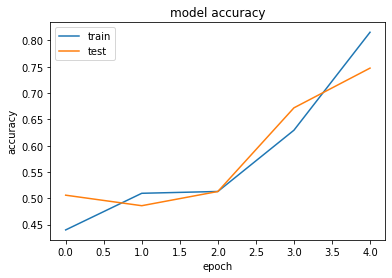

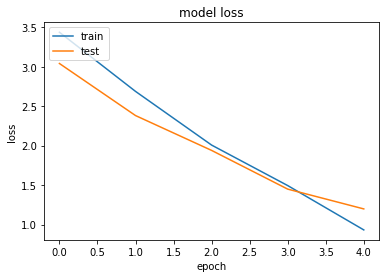

In [6]:
training = model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          batch_size=512,
          epochs=5)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate

In [7]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1905 - accuracy: 0.7382


# Save the model

In [8]:
model.save('models\\multi_class.h5')
model.save('models\\multi_class_pb', save_format="tf")

print(model.input)
print(model.output)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models\multi_class_pb\assets
Tensor("dense_input:0", shape=(None, 10000), dtype=float32)
Tensor("dense_2/Sigmoid:0", shape=(None, 46), dtype=float32)


# Predict

In [9]:
model = models.load_model('models\\multi_class.h5')
prediction = model.predict(x_test)
print(np.argmax(prediction[0]))

3
